# Portfolio Optimization

# Import data

In [56]:
#Get stock tickers in the porfolio 
assets = ['AMD','NFLX','AAPL','TSLA']

In [4]:
StartDate = '2017-01-01'

In [5]:
today = datetime.today().strftime('%Y-%m-%d')
today

'2023-03-02'

In [6]:
import yfinance as yf

In [7]:
#Create a dataframe to store the adjusted close price of the stocks 
df = pd.DataFrame()
for stock in assets:
    df[stock]= yf.download(stock, start = StartDate, end =today)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
df

,AMD,NFLX,AAPL,TSLA
Date,,,,
2017-01-03,11.430000,127.489998,27.133331,14.466000
2017-01-04,11.430000,129.410004,27.102959,15.132667
2017-01-05,11.240000,131.809998,27.240793,15.116667
2017-01-06,11.320000,131.070007,27.544474,15.267333
2017-01-09,11.490000,130.949997,27.796770,15.418667
...,...,...,...,...
2023-02-23,79.750000,323.649994,149.399994,202.070007
2023-02-24,78.089996,317.149994,146.710007,196.880005
2023-02-27,78.769997,323.029999,147.919998,207.630005


We use the Adjusted Close stock price as it adjusts the raw closing stock price with possible stock splits or dividends. The table shows asjust closing price from 01-04-2017 to 03-01-2023

# Visually stock/porfolio

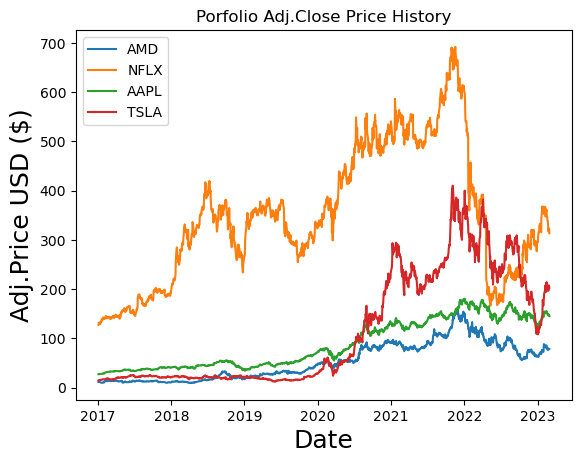

In [10]:
#Visually show the stock/portfolio 
title = 'Porfolio Adj.Close Price History'
#Get the stocks 
my_stocks = df
#Create and plot the graph 
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c],label = c)
plt.title(title)
plt.xlabel('Date', fontsize =18)
plt.ylabel('Adj.Price USD ($)', fontsize =18 )
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [11]:
# show the daily simple return 
returns = df.pct_change()
returns

,AMD,NFLX,AAPL,TSLA
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,0.000000,0.015060,-0.001119,0.046085
2017-01-05,-0.016623,0.018546,0.005086,-0.001057
2017-01-06,0.007117,-0.005614,0.011148,0.009967
2017-01-09,0.015018,-0.000916,0.009160,0.009912
...,...,...,...,...
2023-02-23,0.040987,-0.033534,0.003291,0.006024
2023-02-24,-0.020815,-0.020083,-0.018005,-0.025684
2023-02-27,0.008708,0.018540,0.008248,0.054602


# Check Distribution of Returns

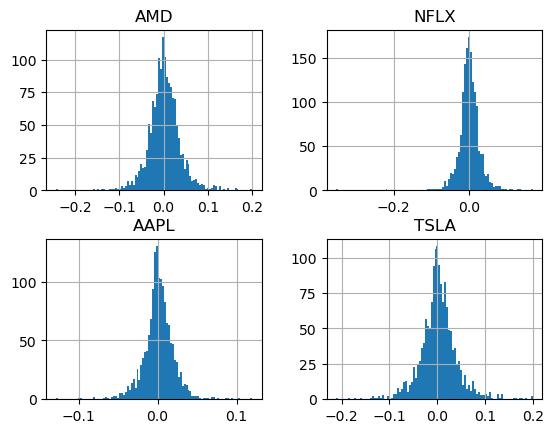

In [12]:
#Create Histogram to check distribution
returns.hist(bins=100)
plt.show()

# Covariance Matrix

In [13]:
# Create and show the annualized covariance matrix 
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,AMD,NFLX,AAPL,TSLA
AMD,0.325740,0.108086,0.093820,0.138179
NFLX,0.108086,0.201853,0.066733,0.103611
AAPL,0.093820,0.066733,0.097819,0.088789
TSLA,0.138179,0.103611,0.088789,0.384064


# Correlation Matrix 

In [15]:
corr_matrix_annual = returns.corr()
corr_matrix_annual

,AMD,NFLX,AAPL,TSLA
AMD,1.000000,0.421517,0.525589,0.390664
NFLX,0.421517,1.000000,0.474908,0.372124
AAPL,0.525589,0.474908,1.000000,0.458087
TSLA,0.390664,0.372124,0.458087,1.000000


# Porfolio Variance

In [18]:
#Assign weights to the stocks. 
weights = np.array([0.25,0.25,0.25,0.25])

In [19]:
#Calculate the porfolio variance 
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.13799449114263546

# Porfolio Volatility 

In [20]:
#Calcualte the portfolio volatility aka standard deviation 
port_volatility = np.sqrt(port_variance) 
port_volatility

0.3714760976733704

# Annual Porfolio Return

In [21]:
#Calculate the annual porfolio return 
portfolio_simple_annual_return = np.sum(returns.mean()*weights)*252
portfolio_simple_annual_return

0.4174451159816457

In [22]:
#Show the expected annual return, volatility(risk), and variance 
percent_var = str(round(port_variance,2)*100)+'%'
percent_vola= str(round(port_volatility,2)*100)+'%'
percent_ret = str(round(portfolio_simple_annual_return,2)*100)+'%'

In [23]:
print('Expect annual return:'+percent_ret)
print('Annual volativity/risk: '+percent_vola)
print('Annual variance: '+percent_var)

Expect annual return:42.0%
Annual volativity/risk: 37.0%
Annual variance: 14.000000000000002%


In [24]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


# Porfolio Optimization 

In [25]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [48]:
#Porfolio Optimization 
#Calculate the expected returns and the annualuzed sample covariance matrix of asset returns 
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize for the maximum sharpe ratio 
ef= EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(clean_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMD', 0.07359), ('NFLX', -0.24586), ('AAPL', 0.86356), ('TSLA', 0.30871)])
Expected annual return: 37.4%
Annual volatility: 33.9%
Sharpe Ratio: 1.04


(0.37380670614540834, 0.33876497491448543, 1.0444016717924274)

In [50]:
0.07359+(-0.24586)+0.86356+0.30871

1.0

In [54]:
# Get the discrete allocation of each share per stock 
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value= 50000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Fund remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'AMD': 20, 'AAPL': 243, 'TSLA': 64}
Fund remaining: $146.59
